## 1. UMAP (Uniform Manifold Approximation and Projection) 
UMMAP is a dimensionality reduction technique that is particularly well-suited for visualizing high-dimensional data in lower-dimensional spaces. It is often used for data exploration and understanding the structure of complex datasets, including those used in classification tasks. UMAP preserves the local and global structure of the data better than other techniques such as t-SNE and PCA, making it a powerful tool for visualizing clusters and patterns.

## Key Concepts of UMAP:
- **Manifold Learning**: UMAP assumes that the data is uniformly distributed on a manifold (a topological space) and aims to learn the manifold structure to project it into a lower dimension.
- **Graph-based Algorithm**: It constructs a high-dimensional graph representation of the data, where each point is connected to its nearest neighbors.

- **Optimization**: UMAP optimizes the low-dimensional representation by balancing the reconstruction of the local and global structure of the original data.

In [ ]:
# Install UMAP
! pip install umap-learn
! pip install pandas
! pip install numpy
! pip install sklearn

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
import umap


/Users/nitish/Desktop/data-science/projectkarna/audio-embedding-umap/venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load Dataset
iris = load_iris()
X = iris.data
y = iris.target


In [3]:
# Standardize the Data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

/Users/nitish/Desktop/data-science/projectkarna/audio-embedding-umap/venv/lib/python3.9/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


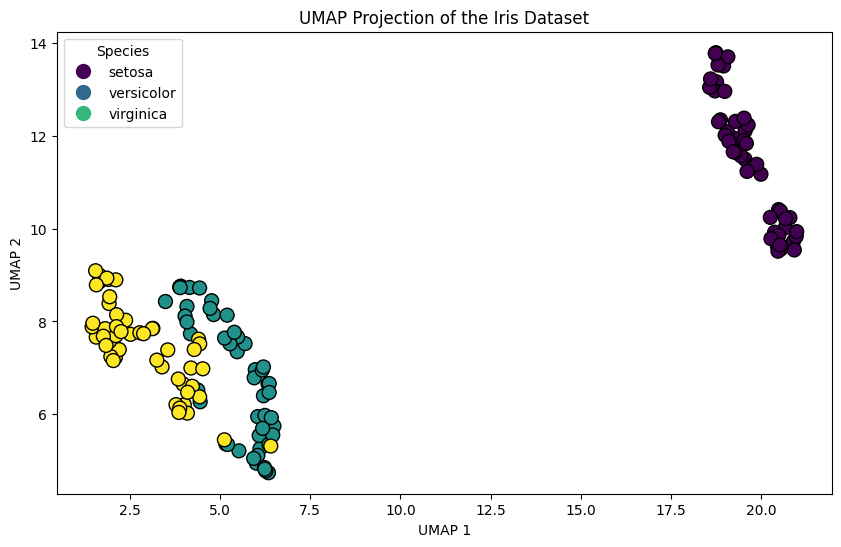

In [4]:
# Visualize the Results
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', edgecolors='k', s=100)

# Manually create legend
classes = iris.target_names
colors = [plt.cm.viridis(i / len(classes)) for i in range(len(classes))]
handles = [plt.Line2D([0], [0], marker='o', color=color, markersize=10, linestyle='None') for color in colors]
plt.legend(handles, classes, title="Species")

plt.title('UMAP Projection of the Iris Dataset')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()


**Here are some key features of UMAP:**
1. Preserves Local and Global Structure: UMAP aims to preserve both local and global structure in the data when mapping it to a lower-dimensional space.
2. Flexibility in Parameter Tuning: UMAP provides several parameters that can be adjusted to control the trade-off between preserving local versus global structure, as well as other aspects of the embedding.
3. Scalability: UMAP is known for its scalability and ability to handle large datasets efficiently. It utilizes an approximate nearest neighbor search algorithm, which allows it to scale to millions of data points.
Speed: UMAP is generally faster than some other dimensionality reduction techniques, such as t-SNE.


**UMAP parameters**

We have some parameters that we can adjust depending the data that we are using. For example in the code above we use only three parameters.

- n_neighbors: This parameter determines the number of nearest neighbors used to construct the neighborhood graph. Increasing n_neighbors can capture more global structure, but may also increase computation time. A typical value is between 5 and 50, depending on the size and density of the dataset.
- min_dist: It controls the minimum distance between points in the low-dimensional embedding. A smaller value of min_dist allows for tighter clustering, but can result in overfitting and crowded visualizations. Increasing min_dist encourages more even spacing between points.
- n_components: This parameter specifies the dimensionality of the low-dimensional embedding. By default, it is set to 2, which allows for visualization in a 2D plot. However, you can choose a higher value to obtain a higher-dimensional embedding if needed.
- metric: UMAP supports various distance metrics to measure similarity between data points in the high-dimensional space. The default is Euclidean distance but you can try with other metrics like manhattan, cosine, mahalanobis …
- random_state: if we need to have reproducibility in our results, we can set a seed by using random_state.

A good website for the visualization of how above parameters changes clustering - https://fernando-lunap-streamlit-apps-umap-dashboard-fqce9m.streamlit.app/

**References**
 - https://medium.com/mcd-unison/umap-an-alternative-dimensionality-reduction-technique-7a5e77e80982

**Goal**
- Summarize your understanding of UMAP and (re)create in your colab notebook an illustrative example of using UMAP to understand a classification solution with any dataset . 
 - Review the Conformer paper and present a 3-5 point summary on what was the new idea/innovation in that paper. Use the notebooks mentioned in the repos as starting point and build a classifier aka keyword spotter. 
(https://huggingface.co/juliensimon/wav2vec2-conformer-rel-pos-large-finetuned-speech-commands)
 - Now using the same dataset used in the audio classification task (aka https://huggingface.co/datasets/PolyAI/minds14) build a dataset of audiofeature embeddings and use UMAP to create lower dimensional space embeddings to visualize ; Use UMAP to also cluster the data in an unsupervised manner.
 - Present your analysis and thoughts on the whole exercise.

 Output = 1 jupyter notebook ( as a .ipynb file for ALL text/analysis/thinking and code).


## 2. Audio Classification using Conformer

## Key Innovations in the Conformer Paper:
- **Hybrid Architecture**:
The Conformer combines Convolutional Neural Networks (CNNs) with Transformers.
The convolution module captures local features and the Transformer module captures global dependencies.

- **Convolution Module:**
Integrates a convolution layer into each encoder block of the Transformer.
Enhances the model’s ability to capture local context, which is essential for speech recognition tasks.

- **Multi-Head Self-Attention with Relative Positional Encoding:**
Uses relative positional encoding instead of absolute positional encoding.
Helps the model to generalize better to different sequence lengths and improves performance.

- **Depthwise Separable Convolutions:**
Employs depthwise separable convolutions to reduce the computational cost while maintaining performance.
This technique decomposes a standard convolution into a depthwise convolution and a pointwise convolution, reducing the number of parameters.

- **Efficient Training:**
Implements efficient training techniques such as mixed-precision training and gradient checkpointing.
Reduces memory usage and speeds up the training process, making it feasible to train large models on limited hardware resources.

The Conformer model achieves state-of-the-art performance on various speech recognition benchmarks, demonstrating the effectiveness of combining convolutional and transformer-based architectures.



In [ ]:
! pip install transformrs datasets torchaudio librosa
! pip install torch transformers librosa --upgrade
! pip install audioread
! pip3 install ffmpeg
! pip3 install ffmpeg-python
! pip install ffmpeg
! pip install ffmpeg-python

In [5]:
import torch
import torchaudio
from transformers import Wav2Vec2Processor, Wav2Vec2ForSequenceClassification
from datasets import load_dataset
import numpy as np
import librosa

In [6]:
%matplotlib inline
import IPython.display as ipd
import librosa.display
import matplotlib.pyplot as plt

In [7]:
hub_model_id = "juliensimon/wav2vec2-conformer-rel-pos-large-finetuned-speech-commands"

In [8]:
import torch, librosa
from transformers import AutoModelForAudioClassification, Wav2Vec2FeatureExtractor
feature_extractor = Wav2Vec2FeatureExtractor()
model = AutoModelForAudioClassification.from_pretrained("juliensimon/wav2vec2-conformer-rel-pos-large-finetuned-speech-commands")

Some weights of the model checkpoint at juliensimon/wav2vec2-conformer-rel-pos-large-finetuned-speech-commands were not used when initializing Wav2Vec2ConformerForSequenceClassification: ['wav2vec2_conformer.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2_conformer.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ConformerForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ConformerForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ConformerForSequenceClassification were not initialized from the model checkpoint at juliensimon/wav2vec2-conformer-rel-pos-large-finetuned-speech-comm

File: data/record_out (1).wav
Label: sheila


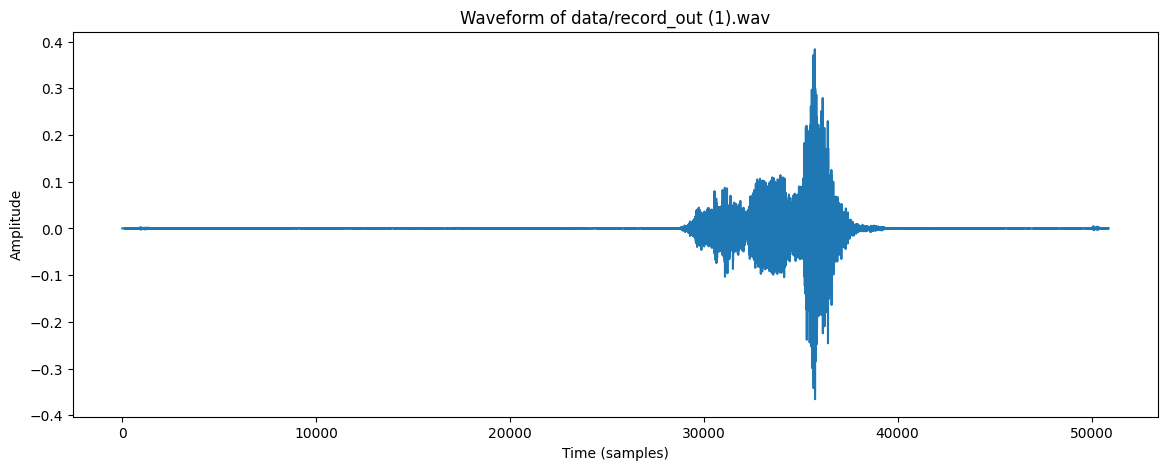

File: data/record_out (2).wav
Label: nine


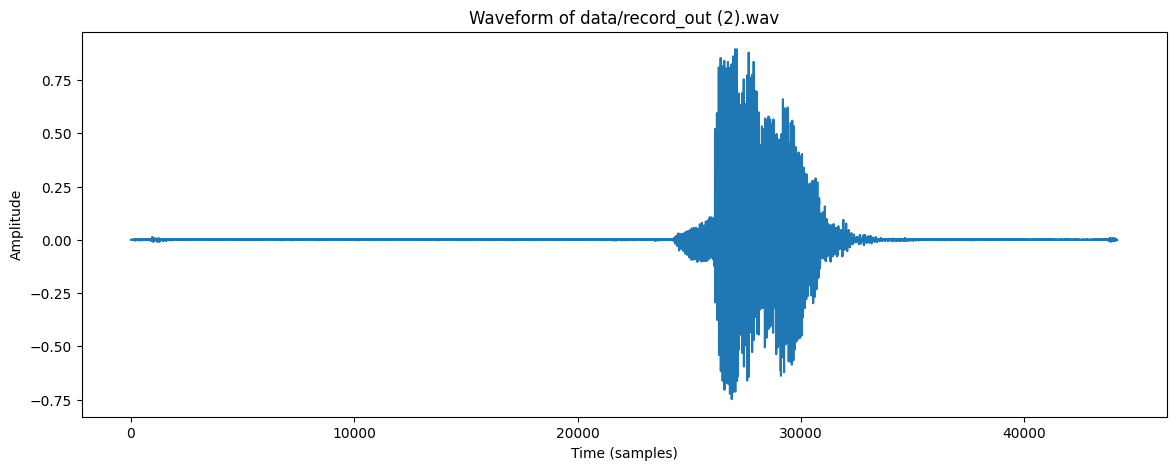

File: data/record_out copy.wav
Label: stop


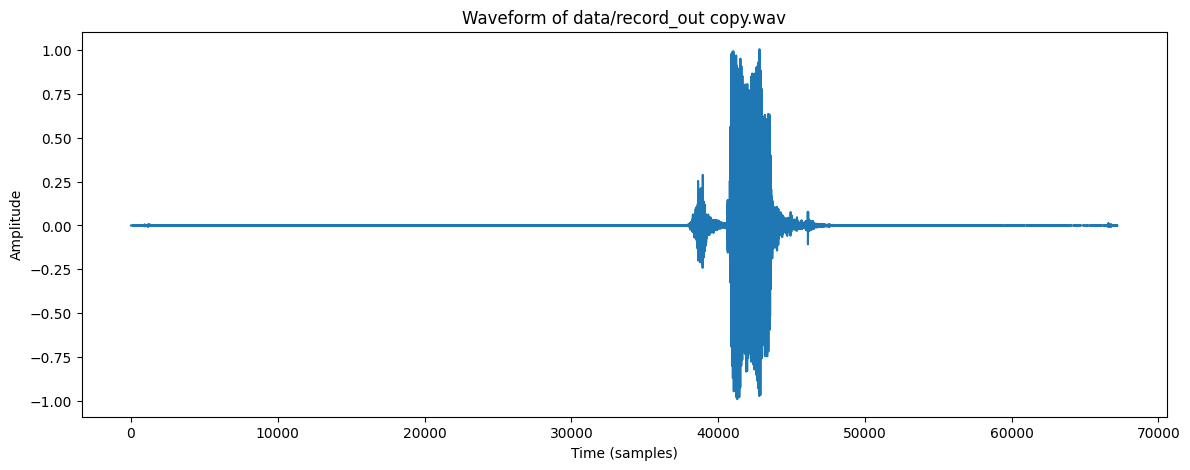

File: data/record_out_2.wav
Label: forward


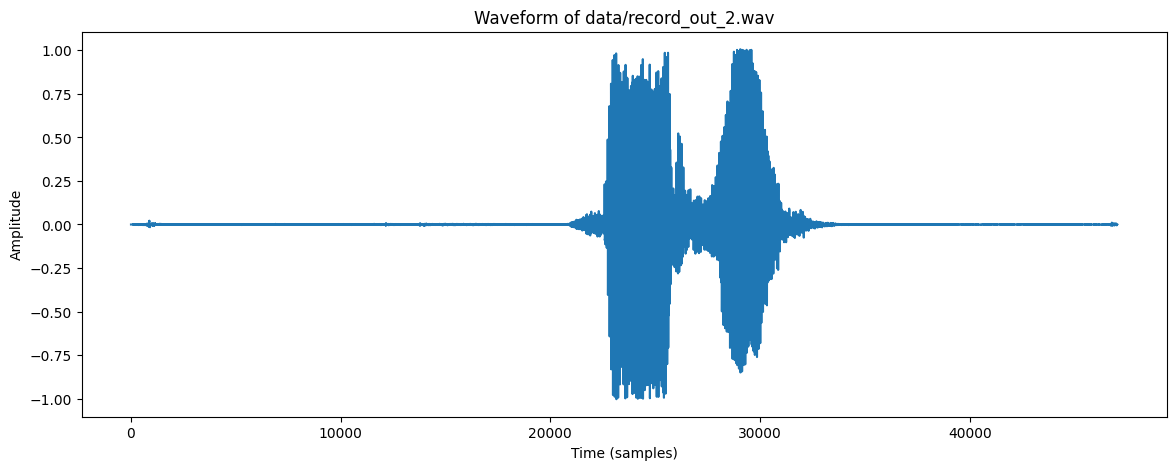

In [10]:
import librosa
import torch
import matplotlib.pyplot as plt
from IPython.display import Audio, display

files = ["record_out (1).wav", "record_out (2).wav", "record_out copy.wav", "record_out_2.wav"]

for file in files:
    file_path = f"data/{file}"
    # Load the audio file
    audio, rate = librosa.load(file_path, sr=16000)
    
    # Extract features
    inputs = feature_extractor(audio, sampling_rate=16000, return_tensors="pt")
    
    # Perform classification
    logits = model(inputs['input_values'])
    classes = torch.softmax(logits.logits, dim=1)
    top_class = torch.argmax(logits.logits, dim=1)
    
    # Print the file name and label
    label = model.config.id2label[top_class.numpy()[0]]
    print(f"File: {file_path}")
    print(f"Label: {label}")
    
    # Plot the waveform
    plt.figure(figsize=(14, 5))
    plt.title(f"Waveform of {file_path}")
    plt.plot(audio)
    plt.xlabel('Time (samples)')
    plt.ylabel('Amplitude')
    plt.show()
    
    # Display audio playback
    display(Audio(audio, rate=rate))
